### Grades of Students dataset
* Problem Statement:
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

* Columns Description    --  total 43 columns
* -Seat No : The enrolled number of candidate that took the exams

-

* CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

 

*       All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam



 

Predict   CGPA of a student based on different grades in four years.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('Grades.csv')

In [4]:
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [32]:
data[data['PH-121']=='A']

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,...,C+,B-,B+,B-,A,A,A-,B,A,3.247
13,CS-97014,A,C-,A-,C-,B,A-,C+,A-,A-,...,B,A-,A-,B+,A-,A,A,A-,A,3.523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,CS-97549,A,A,A,A,C+,A,B+,C,B+,...,B,B,B,B,B-,A-,A,C+,B,3.182
551,CS-97552,A,B-,A,B+,A,A,B+,B+,A,...,B+,B-,A,C,B+,C,B-,C,B-,3.218
553,CS-97554,A,B,A+,C+,A,A,A-,A,B-,...,A-,B+,A,B+,A,C+,A-,B,A-,3.491
556,CS-97557,A,B+,A+,A,A,B+,A-,B,A-,...,A,A-,A,B+,A,B,A,B+,A,3.624


In [67]:
data.nunique()  

Seat No.     571
PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [6]:
data.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [7]:
data['CS-412'].unique()

array(['A-', 'B', 'A', 'C+', 'B+', 'C-', 'B-', nan, 'A+', 'C', 'D+', 'F',
       'W', 'D'], dtype=object)

In [79]:


for i in data.columns:
    print(i)
    print(data[i].value_counts())
    #print('\n')
    print('__________________________________________________________________________________________\n')    

Seat No.
CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: Seat No., Length: 571, dtype: int64
__________________________________________________________________________________________

PH-121
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64
__________________________________________________________________________________________

HS-101
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64
__________________________________________________________________________________________

CY-105
A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64
_________________________________________________

In [14]:
data.describe(include = 'object')

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
count,571,571,571,570,570,569,571,569,569,569,...,562,561,559,559,559,486,558,558,557,492
unique,571,13,12,13,13,13,11,13,13,12,...,13,14,12,11,13,14,13,12,12,13
top,CS-97001,A-,A-,A,A,A-,A,A-,A-,A-,...,A-,A+,B-,A,B,A-,A,A-,A-,A-
freq,1,112,82,177,96,105,151,116,105,137,...,120,93,79,133,86,177,176,120,122,157


In [15]:
data.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [11]:
data.select_dtypes(include='object').columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412'],
      dtype='object')

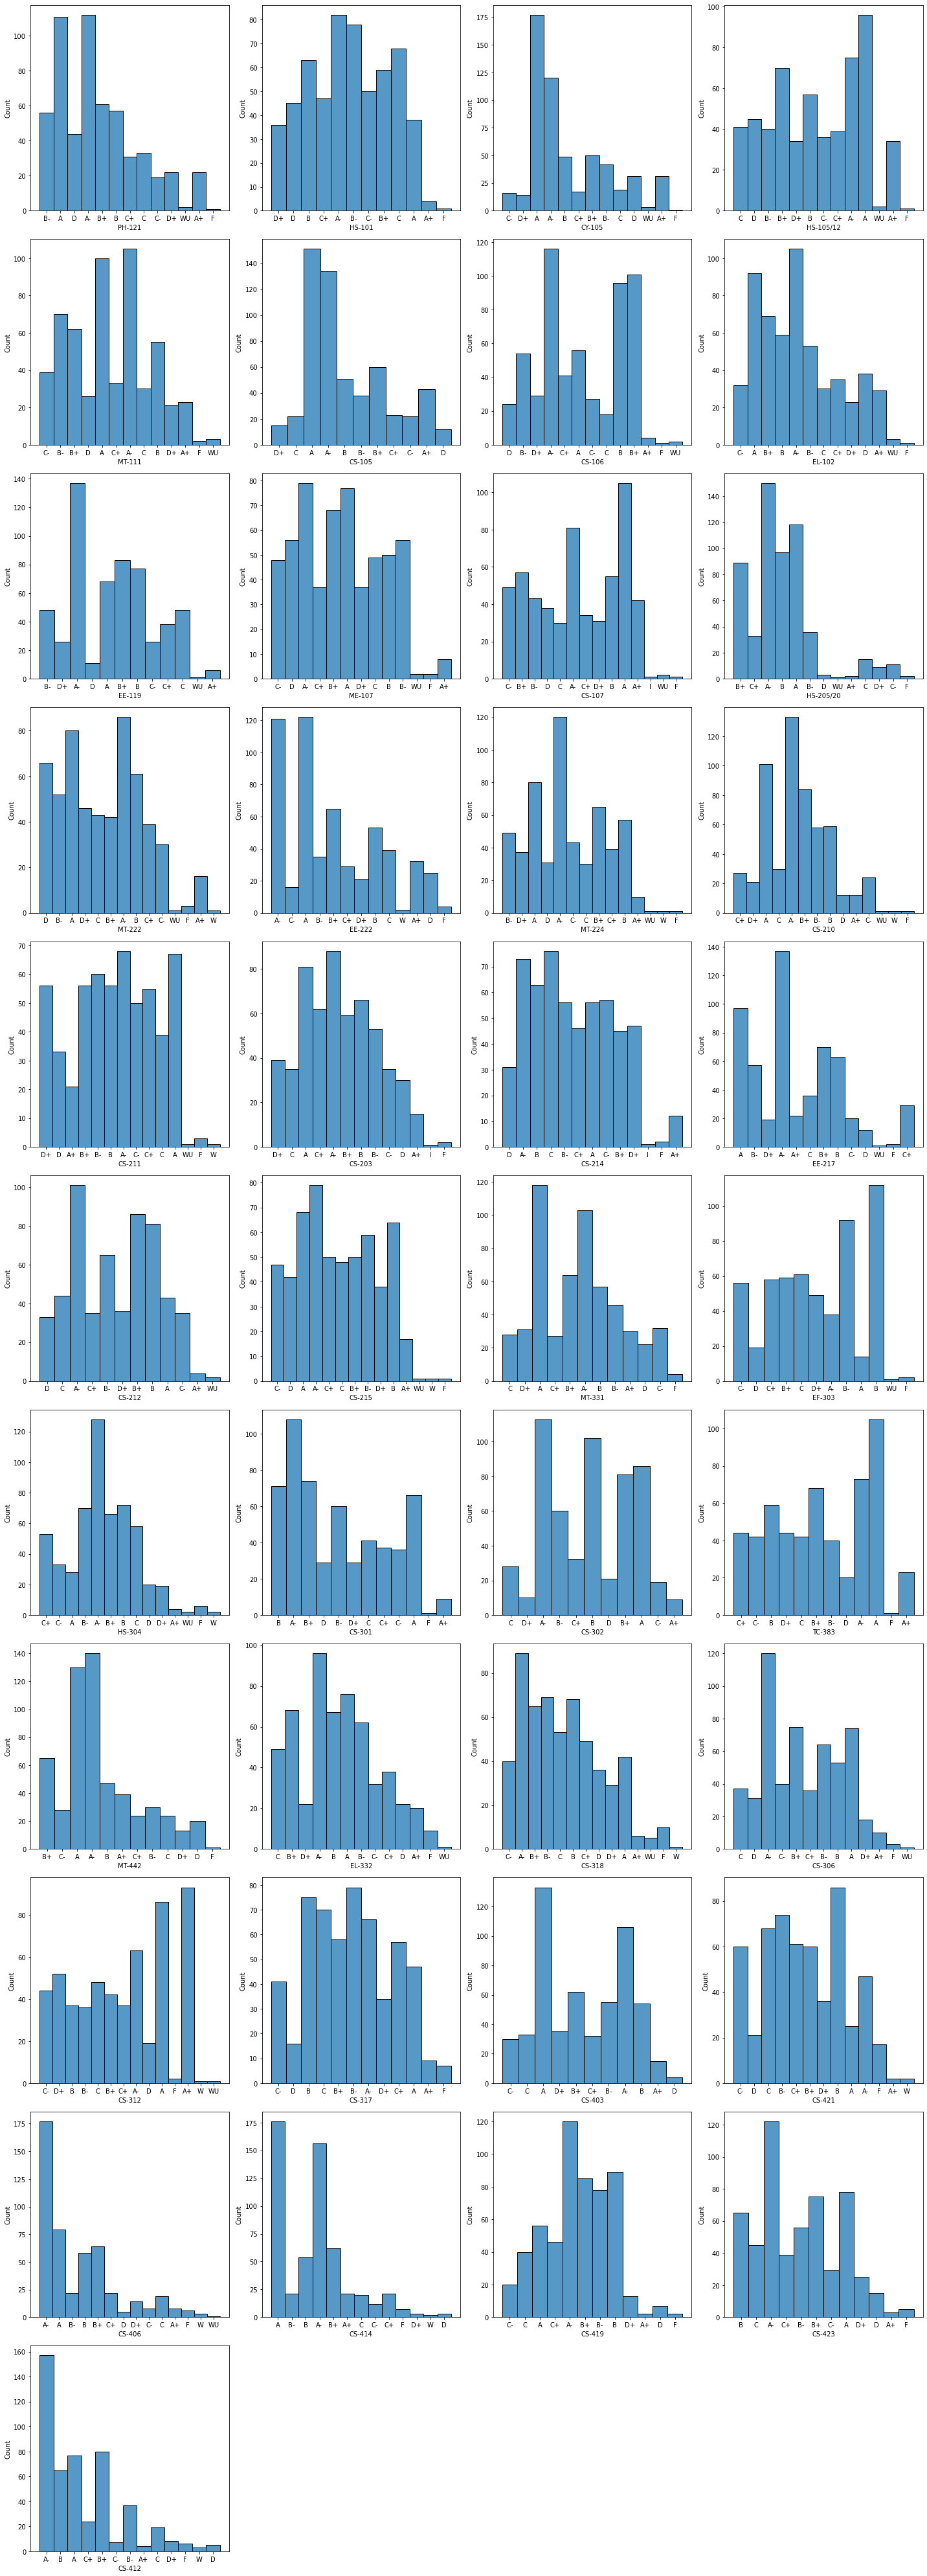

In [12]:
num_cols = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412']

cols = 4                                                         #we can see the frequency ditribution here
rows = 14
#num_cols = data.select_dtypes(include='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = data[col], ax = ax)
    
fig.tight_layout()  
plt.show()

In [13]:
data['EF-303'].value_counts()

B     112
B-     92
C      61
B+     59
C+     58
C-     56
D+     49
A-     38
D      19
A      14
F       2
WU      1
Name: EF-303, dtype: int64

* EF-303 is dificult subject where no one got A+ and most of the student got B grade and so many students having D+ grade is also 
* CS-414, CY-105, CS-406 and CS-412 are the easiest subject among all where most of the students got A+, A and A- grades

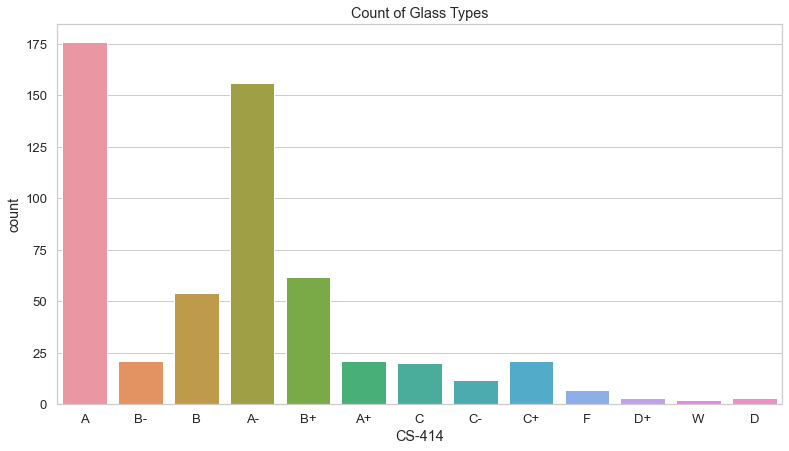

In [20]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (13,7))
sns.countplot('CS-414',data=data).set_title('Count of Glass Types')
plt.show()

In [37]:
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


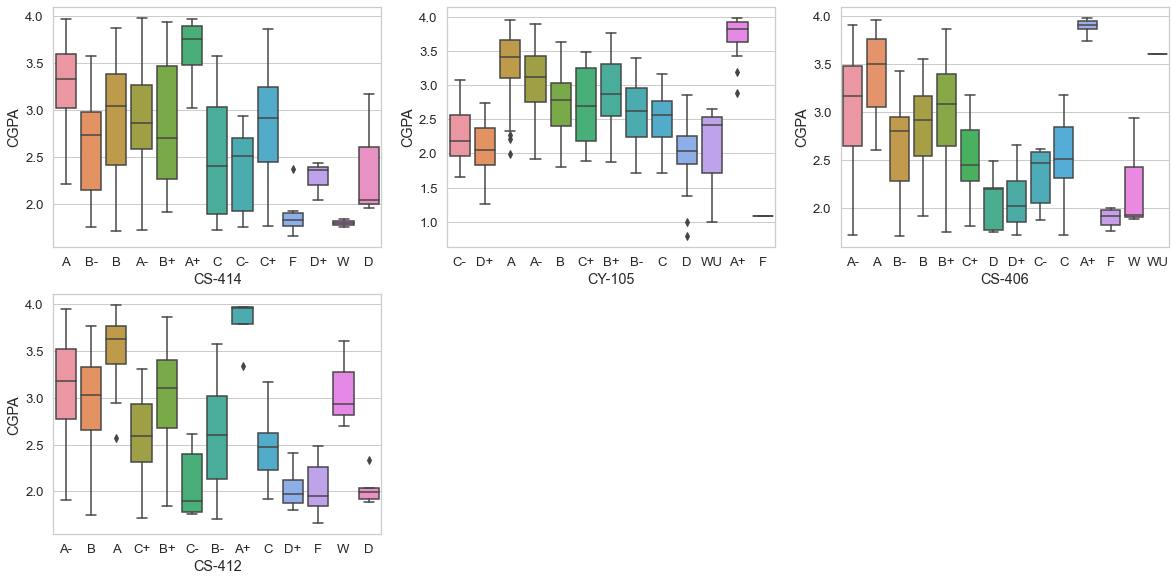

In [42]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(y='CGPA', x='CS-414', data=data)
plt.subplot(3,3,2)
sns.boxplot(y='CGPA', x='CY-105', data=data)
plt.subplot(3,3,3)
sns.boxplot(y='CGPA', x='CS-406', data=data)
plt.subplot(3,3,4)
sns.boxplot(y='CGPA', x='CS-412', data=data)


plt.show()

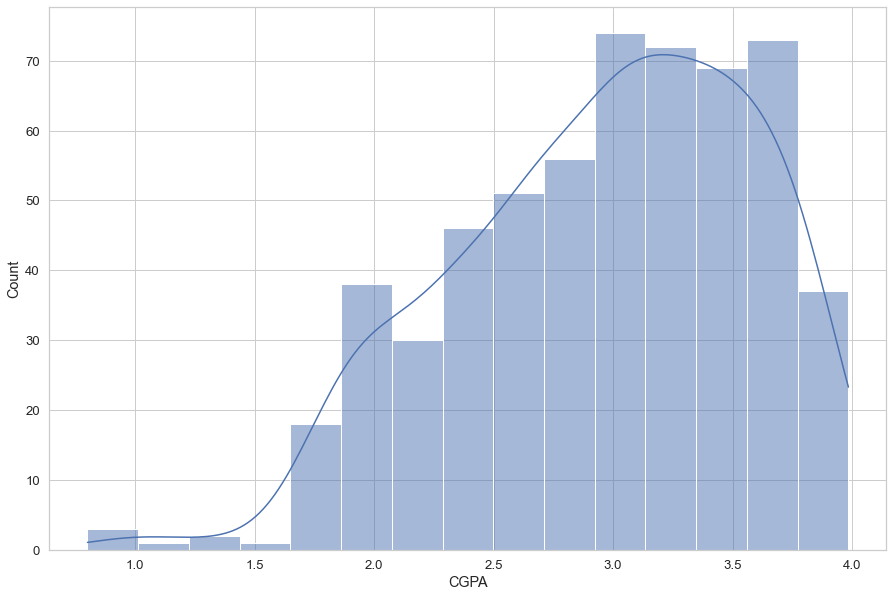

In [36]:
 plt.figure( figsize=(15,10))
sns.histplot(x = data['CGPA'], kde = True)
plt.show()

* Most of the students gets 3 to 3.5 CGPA, While few gets 1 to 1.8 CGPA
*  Graph skewed to left, mean < mode

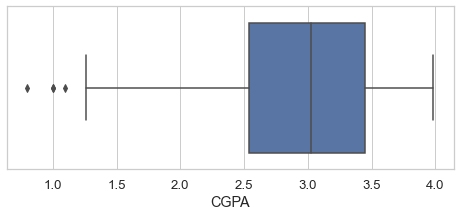

In [53]:
plt.figure(figsize = (8, 3))
sns.boxplot(x='CGPA', data=data)
plt.show()

* the bulk of observations are on the high end of the scale, a boxplot is left skewed.

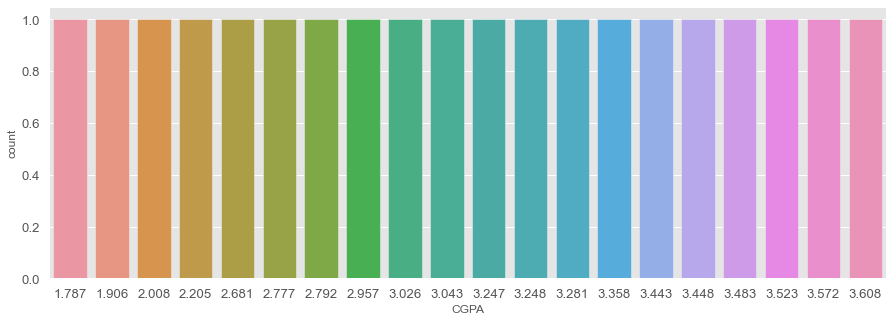

In [73]:
plt.figure(figsize=(15,5))
sns.countplot(data['CGPA'][:20])
plt.show()

In [64]:
for x in range(95, 101 , 1):
    print("{}% of people having CGPA are less than equal to {}".format(x, data.CGPA.quantile(x/100)))
iqr = data.CGPA.quantile(0.75) - data.CGPA.quantile(0.25)
print('IQR {}'.format(iqr))

95% of people having CGPA are less than equal to 3.8255
96% of people having CGPA are less than equal to 3.8569999999999998
97% of people having CGPA are less than equal to 3.876
98% of people having CGPA are less than equal to 3.9146
99% of people having CGPA are less than equal to 3.9438999999999997
100% of people having CGPA are less than equal to 3.985
IQR 0.9129999999999998


In [56]:
data.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [57]:
data.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

### As it is there are categorical values in all columns , so it replace with mode 

In [59]:
cols = ['CY-105', 'HS-105/12', 'MT-111',
        'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412']
data[cols]=data[cols].fillna(data.mode().iloc[0])

In [62]:
data.isnull().sum().sum()

0

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [101]:
cols = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412']
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
#data[col]= label_encoder.fit_transform(data[col])
  


In [102]:
data[cols] = data[cols].apply(LabelEncoder().fit_transform)

In [103]:
data[cols] 

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5,10,8,6,8,10,9,8,5,8,...,6,8,8,8,8,2,0,8,3,2
1,0,9,10,9,5,6,9,0,10,9,...,9,10,9,6,9,2,5,6,6,3
2,0,3,0,5,4,0,5,4,2,2,...,2,3,3,0,6,0,0,0,2,0
3,9,7,10,9,9,2,10,8,9,7,...,8,10,6,10,8,5,3,7,7,7
4,2,2,2,4,0,0,2,4,0,2,...,2,5,4,4,5,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,4,2,2,0,0,0,4,4,3,0
567,1,0,0,0,0,0,0,2,0,0,...,2,4,4,0,0,2,3,2,6,2
568,3,0,2,4,0,0,0,0,0,3,...,4,2,3,0,4,0,6,4,2,2
569,0,4,9,0,9,10,5,8,5,8,...,4,9,3,3,8,9,6,3,5,6


In [107]:
data.drop(['Seat No.'], axis = 1, inplace = True)

In [108]:
data

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,2,2,0,0,0,4,4,3,0,3.798
567,1,0,0,0,0,0,0,2,0,0,...,4,4,0,0,2,3,2,6,2,3.772
568,3,0,2,4,0,0,0,0,0,3,...,2,3,0,4,0,6,4,2,2,3.470
569,0,4,9,0,9,10,5,8,5,8,...,9,3,3,8,9,6,3,5,6,2.193


In [109]:
X = data.drop(["CGPA"], axis = 1)
y = data[["CGPA"]]

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [113]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9542844268409766

In [114]:
pd.DataFrame(lr_clf.predict(X_test))

,0
0,2.853888
1,2.747436
2,2.496460
3,3.078794
4,3.628974
...,...
110,1.974537
111,2.583837
112,1.971145
113,2.855012


In [115]:
import statsmodels.api as sm

X_constant = sm.add_constant(X)
model = sm.OLS(y,X_constant).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CGPA   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     175.0
Date:                Fri, 27 Jan 2023   Prob (F-statistic):          3.55e-279
Time:                        17:39:53   Log-Likelihood:                 227.43
No. Observations:                 571   AIC:                            -370.9
Df Residuals:                     529   BIC:                            -188.3
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1898      0.022    187.035      0.000       4.146       4.234
PH-121        -0.0204      0.004     -5.225      0.000      -0.028      -0.013
HS-101        -0.0134      0.003     -3.961      0.000      -0.020      -0.007
CY-105        -0.0199      0.004     -5.271      0.000      -0.027      -0.013
HS-105/12     -0.0079      0.003     -2.361      0.019      -0.014      -0.001
MT-111        -0.0098      0.004     -2.548      0.011      -0.017      -0.002
CS-105        -0.0239      0.004     -5.925      0.000      -0.032      -0.016
CS-106        -0.0109      0.004     -3.042      0.002      -0.018      -0.004
EL-102        -0.0104      0.003     -3.173      0.002      -0.017      -0.004
EE-119        -0.0136      0.004     -3.459      0.001      -0.021      -0.006
ME-107        -0.0136      0.003     -3.997      0.000      -0.020      -0.007
CS-107        -0.0103      0.003     -3.084      0.002      -0.017      -0.004
HS-205/20     -0.0115      0.004     -2.983      0.003      -0.019      -0.004
MT-222         0.0006      0.003      0.187      0.851      -0.006       0.007
EE-222         0.0041      0.004      1.166      0.244      -0.003       0.011
MT-224        -0.0084      0.004     -2.191      0.029      -0.016      -0.001
CS-210        -0.0185      0.005     -4.083      0.000      -0.027      -0.010
CS-211        -0.0021      0.004     -0.578      0.564      -0.009       0.005
CS-203        -0.0009      0.004     -0.255      0.798      -0.008       0.006
CS-214        -0.0117      0.004     -3.024      0.003      -0.019      -0.004
EE-217        -0.0094      0.004     -2.299      0.022      -0.017      -0.001
CS-212        -0.0012      0.004     -0.284      0.777      -0.010       0.007
CS-215        -0.0107      0.004     -2.692      0.007      -0.019      -0.003
MT-331        -0.0070      0.003     -2.135      0.033      -0.013      -0.001
EF-303        -0.0019      0.004     -0.466      0.641      -0.010       0.006
HS-304         0.0036      0.004      0.848      0.397      -0.005       0.012
CS-301        -0.0118      0.004     -2.690      0.007      -0.020      -0.003
CS-302        -0.0040      0.005     -0.847      0.397      -0.013       0.005
TC-383        -0.0004      0.004     -0.116      0.908      -0.008       0.007
MT-442        -0.0022      0.004     -0.611      0.541      -0.009       0.005
EL-332        -0.0085      0.004     -1.931      0.054      -0.017       0.000
CS-318         0.0043      0.004      1.180      0.238      -0.003       0.012
CS-306        -0.0070      0.005     -1.525      0.128      -0.016       0.002
CS-312        -0.0023      0.004     -0.604      0.546      -0.010       0.005
CS-317        -0.0201      0.005     -4.382      0.000      -0.029      -0.011
CS-403         0.0028      0.004      0.747      0.455      -0.005       0.010
CS

In [116]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.95111291, 0.80481492, 0.91229331, 0.90767075, 0.91909731])

In [121]:
y_predict = lr_clf.predict(X_test)

In [122]:
from sklearn import metrics

print(metrics.mean_absolute_error(y_test, y_predict))
print(metrics.mean_squared_error(y_test, y_predict))
print(np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

0.09446388695659745
0.01504446942346894
0.12265589844548423


In [126]:
## Ridge

from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train,y_train)
print('Train Score:',model.score(X_train,y_train))
print('Test Score:',model.score(X_test,y_test))

Train Score: 0.9243657727034026
Test Score: 0.9543252488052695


In [132]:
## Elastic net

from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import r2_score

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                         precompute='auto', max_iter=2000, tol=0.0001, cv = 10 ,
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

cv_model.fit(X_train,y_train)

print('Optimal alpha: ',cv_model.alpha_)
print('Optimal l1_ratio: ',cv_model.l1_ratio_)
print('Number of iterations',cv_model.n_iter_)

Optimal alpha:  0.228147050828145
Optimal l1_ratio:  0.1
Number of iterations 87


In [133]:
print("Training Score:", cv_model.score(X_train,y_train))
print("Testing Score:", cv_model.score(X_test,y_test))

Training Score: 0.9211837370611062
Testing Score: 0.9656259953833239


In [137]:

# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostRegressor


# Create adaboost classifer object
abc = AdaBoostRegressor(n_estimators=10, learning_rate=1, random_state=5)

# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = model1.predict(X_test)

In [138]:
print('Train Score:',model1.score(X_train,y_train))
print('Test Score:',model1.score(X_test,y_test))

Train Score: 0.909854801530368
Test Score: 0.8746870149368766


In [140]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor(max_depth=5).fit(X_train,y_train)

In [142]:
#Predict the response for test dataset
Y_pred = model2.predict(X_test)

In [143]:
print('Train Score:',model2.score(X_train,y_train))
print('Test Score:',model2.score(X_test,y_test))

Train Score: 0.9257772176590641
Test Score: 0.8507793634995559


In [144]:
from sklearn.ensemble import RandomForestRegressor

In [145]:
reg_rf = RandomForestRegressor(n_estimators=1000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25)
reg_rf.fit(X_train, y_train)
y_pred3= reg_rf.predict(X_test)

print("Accuracy on Traing set: ",reg_rf.score(X_train,y_train))

Accuracy on Traing set:  0.9895618264093117


In [147]:
print('Train Score:',reg_rf.score(X_train,y_train))
print('Test Score:',reg_rf.score(X_test,y_test))

Train Score: 0.9895618264093117
Test Score: 0.9685943415244173


In [149]:

print(metrics.mean_absolute_error(y_test, y_pred3))
print(metrics.mean_squared_error(y_test, y_pred3))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

0.07600962608695659
0.01033524105705219
0.10166238762222826


In [150]:
import pickle

Pkl_Filename = "random_forest_Stu_Grade"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(reg_rf, file)